In [1]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#read cvs file
df = pd.read_csv('../dataset/processed/crop_yield_cleansing_data.csv')

# Display the first 5 rows
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_orig,Humidity_orig,Wind_Speed_orig,Soil_Quality_orig
0,2014-01-01,Wheat,Peaty,5.50,9,80,11,60.5,45.0,31.5,0.000000,23,2014,1,1,9.440599,80.000000,10.956707,22.833333
1,2014-01-01,Corn,Loamy,6.50,20,80,9,84.0,66.0,50.0,104.871310,67,2014,1,1,20.052576,79.947424,8.591577,66.666667
2,2014-01-01,Rice,Peaty,5.50,12,80,7,71.5,54.0,38.5,0.000000,27,2014,1,1,12.143099,80.000000,7.227751,27.333333
3,2014-01-01,Barley,Sandy,6.75,20,80,3,50.0,40.0,30.0,58.939796,35,2014,1,1,19.751848,80.000000,2.682683,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16,80,8,49.5,45.0,38.5,32.970413,22,2014,1,1,16.110395,80.000000,7.696070,22.166667


In [4]:
#Print data info (data types, non-null counts, memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36211 entries, 0 to 36210
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               36211 non-null  object 
 1   Crop_Type          36211 non-null  object 
 2   Soil_Type          36211 non-null  object 
 3   Soil_pH            36211 non-null  float64
 4   Temperature        36211 non-null  int64  
 5   Humidity           36211 non-null  int64  
 6   Wind_Speed         36211 non-null  int64  
 7   N                  36211 non-null  float64
 8   P                  36211 non-null  float64
 9   K                  36211 non-null  float64
 10  Crop_Yield         36211 non-null  float64
 11  Soil_Quality       36211 non-null  int64  
 12  Year               36211 non-null  int64  
 13  Month              36211 non-null  int64  
 14  Day                36211 non-null  int64  
 15  Temperature_orig   36211 non-null  float64
 16  Humidity_orig      362

In [5]:
#Display summary statistics for numerical columns
print(df.describe())

            Soil_pH  Temperature      Humidity    Wind_Speed             N  \
count  36211.000000  36211.00000  36211.000000  36211.000000  36211.000000   
mean       6.602386     23.70172     74.360636     10.017674     66.015037   
std        0.817180      8.79772      6.621080      2.958372     10.888556   
min        5.500000     -4.00000     55.000000      2.000000     45.000000   
25%        6.250000     17.00000     70.000000      8.000000     58.500000   
50%        6.500000     23.00000     77.000000     10.000000     65.000000   
75%        6.750000     30.00000     80.000000     12.000000     71.500000   
max        8.000000     45.00000     80.000000     18.000000     91.000000   

                  P             K    Crop_Yield  Soil_Quality          Year  \
count  36211.000000  36211.000000  36211.000000  36211.000000  36211.000000   
mean      53.017591     42.020684     27.009032     37.528817   2018.499710   
std        8.812486      8.538663     25.742822     17.70242

One-Way ANOVA

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

groups = [group["Crop_Yield"].values for name, group in df.groupby("Crop_Type")]

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 21.79333727374859
p-value: 2.7291199204263177e-37


F-statistic = 21.79 → 모델의 설명력이 높음
p-value ≈ 0.000… → 모델이 우연히 만들어졌을 가능성이 사실상 0에 가까움
결론: 모델은 유의미하며, 예측에 사용하는 변수들이 실제로 통계적으로 유효하다.

In [ ]:
# Two-Way ANOVA
# 두 개의 범주형 요인(Crop_Type + Soil_Type)이 수확량에 어떤 영향을 미치는지
# **그리고 두 요인의 상호작용(interaction)**이 있는지도 확인할 수 있습니다.
# This test examines how two categorical factors (Crop_Type and Soil_Type)
# affect the dependent variable (Crop_Yield).
# It also checks whether there is an *interaction effect* between the two factors.


import statsmodels.api as sm
from statsmodels.formula.api import ols

# 모델식: Crop_Yield ~ Crop_Type + Soil_Type + Crop_Type:Soil_Type
# Define the model formula:
# Crop_Yield ~ Crop_Type + Soil_Type + Crop_Type:Soil_Type
# The interaction term (Crop_Type:Soil_Type) tests whether the effect of one
# factor depends on the level of the other factor.

model = ols('Crop_Yield ~ C(Crop_Type) + C(Soil_Type) + C(Crop_Type):C(Soil_Type)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq       df           F        PR(>F)
C(Crop_Type)               1.293107e+05      9.0   22.824958  3.164856e-39
C(Soil_Type)               1.072639e+06      4.0  426.002061  0.000000e+00
C(Crop_Type):C(Soil_Type)  3.153525e+04     36.0    1.391592  5.950251e-02
Residual                   2.276262e+07  36161.0         NaN           NaN


🧪 Tukey HSD란 무엇인가?

Tukey’s HSD (Honestly Significant Difference) 검정은
ANOVA(분산분석) 를 수행한 이후(post-hoc) 에 사용하는 사후 분석(post-hoc test) 입니다.

“ANOVA 결과에서 유의미한 차이가 있다고 나왔는데,
도대체 어떤 그룹끼리 차이가 있는 걸까?”
를 알려주는 검정이에요.

In [36]:
# Post-hoc test
# ANOVA는 “차이가 있다”까지만 알려줍니다. “어떤 그룹끼리 다른가?”를 알려면 Tukey HSD로 분석합니다.
# ANOVA: “차이가 있다”
# Tukey HSD: “누구랑 누구 사이에 차이가 있는지 알려준다”

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Crop_Yield'],
                          groups=df['Crop_Type'],
                          alpha=0.05)
print(tukey)

# plt.figure(figsize=(10, 6))
# tukey.plot_simultaneous(comparison_name=None)
# plt.title("Tukey HSD Test - Crop Type Mean Comparison (95% CI)")
# plt.xlabel("Mean Difference in Crop Yield")
# plt.ylabel("Crop Type")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.show()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Barley      Corn    2.705 0.0003  0.7955  4.6145   True
   Barley    Cotton   3.6385    0.0   1.729   5.548   True
   Barley    Potato    0.601 0.9926  -1.308  2.5099  False
   Barley      Rice   3.1333    0.0  1.2239  5.0427   True
   Barley   Soybean   0.3545 0.9999 -1.5549  2.2638  False
   Barley Sugarcane   3.1726    0.0  1.2629  5.0822   True
   Barley Sunflower   1.8574 0.0646 -0.0523   3.767  False
   Barley    Tomato  -2.8203 0.0001 -4.7307 -0.9099   True
   Barley     Wheat   0.2672    1.0 -1.6426  2.1769  False
     Corn    Cotton   0.9335  0.873 -0.9755  2.8425  False
     Corn    Potato   -2.104 0.0175 -4.0125 -0.1956   True
     Corn      Rice   0.4283 0.9995 -1.4805  2.3371  False
     Corn   Soybean  -2.3505 0.0039 -4.2593 -0.4417   True
     Corn Sugarcane   0.4676 0.9989 -1.4415  2.3767  Fal

In [37]:
#ANOVA Workflow with Bilingual Comments

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Counts by Crop_Type:
 Crop_Type
Potato       3626
Rice         3623
Soybean      3623
Corn         3622
Cotton       3622
Sugarcane    3621
Sunflower    3621
Wheat        3620
Barley       3618
Tomato       3615
Name: count, dtype: int64

Counts by Soil_Type:
 Soil_Type
Saline    7299
Clay      7240
Peaty     7234
Loamy     7226
Sandy     7212
Name: count, dtype: int64


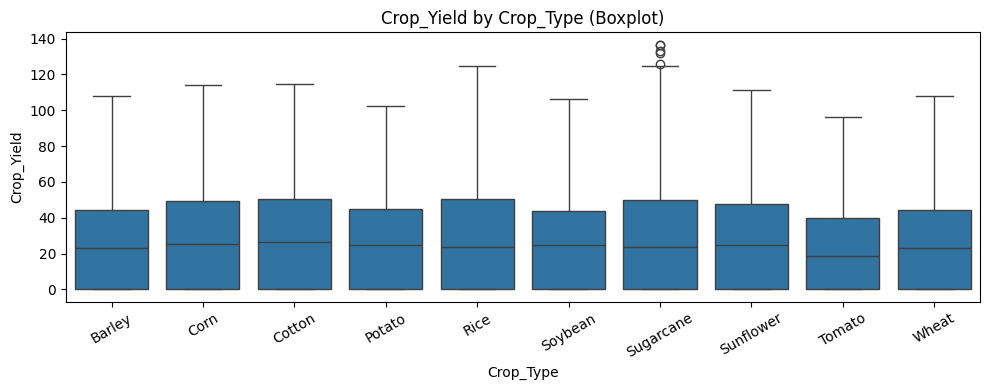

In [38]:
# 1) Basic checks & preparation
# 기본 점검 및 전처리 / Basic sanity checks & preprocessing
# - 범주형(카테고리) 강제 변환: ANOVA에서 범주형 처리가 안정적 / cast to category for stable ANOVA handling
df["Crop_Type"] = df["Crop_Type"].astype("category")
df["Soil_Type"] = df["Soil_Type"].astype("category")

# - 결측치 점검 / check missing values
assert df["Crop_Yield"].isna().sum() == 0, "Crop_Yield has missing values."
assert df["Crop_Type"].isna().sum() == 0, "Crop_Type has missing values."
assert df["Soil_Type"].isna().sum() == 0, "Soil_Type has missing values."

# - 각 그룹 샘플 수 빠른 확인 / quick group sizes
print("Counts by Crop_Type:\n", df["Crop_Type"].value_counts())
print("\nCounts by Soil_Type:\n", df["Soil_Type"].value_counts())

# - 극단치(이상치) 시각 점검(선택) / optional: quick outlier glance
plt.figure(figsize=(10,4))
sns.boxplot(x="Crop_Type", y="Crop_Yield", data=df)
plt.title("Crop_Yield by Crop_Type (Boxplot)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [39]:
# 2) One-Way ANOVA: Crop_Yield ~ Crop_Type
# 일원분산분석: 작물 종류에 따라 평균 수확량이 다른가?
# One-way ANOVA: does mean Crop_Yield differ by Crop_Type?

# - 그룹 배열 만들기 / build list of arrays for each group
groups = [grp["Crop_Yield"].values for _, grp in df.groupby("Crop_Type") if len(grp) >= 2]

# - 주의: 표본이 1개인 그룹은 제외 / exclude groups with only 1 sample
f_stat, p_value = f_oneway(*groups)
print("\n[One-Way ANOVA] Crop_Yield ~ Crop_Type")
print("F-statistic:", f_stat, "| p-value:", p_value)
# 해석: p<0.05 이면 작물 유형별 평균 수확량 차이가 유의함
# Interpretation: if p<0.05, mean yields differ across Crop_Type


[One-Way ANOVA] Crop_Yield ~ Crop_Type
F-statistic: 21.79333727374859 | p-value: 2.7291199204263177e-37


In [40]:
# 3) Post-hoc test (Tukey HSD) after significant One-Way ANOVA
# 사후검정: 어떤 그룹끼리 다른지 탐색
# Post-hoc: identify which pairs differ
tukey = pairwise_tukeyhsd(endog=df["Crop_Yield"],
                          groups=df["Crop_Type"],
                          alpha=0.05)
print("\n[Tukey HSD] Pairwise comparisons for Crop_Type")
print(tukey)


[Tukey HSD] Pairwise comparisons for Crop_Type
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Barley      Corn    2.705 0.0003  0.7955  4.6145   True
   Barley    Cotton   3.6385    0.0   1.729   5.548   True
   Barley    Potato    0.601 0.9926  -1.308  2.5099  False
   Barley      Rice   3.1333    0.0  1.2239  5.0427   True
   Barley   Soybean   0.3545 0.9999 -1.5549  2.2638  False
   Barley Sugarcane   3.1726    0.0  1.2629  5.0822   True
   Barley Sunflower   1.8574 0.0646 -0.0523   3.767  False
   Barley    Tomato  -2.8203 0.0001 -4.7307 -0.9099   True
   Barley     Wheat   0.2672    1.0 -1.6426  2.1769  False
     Corn    Cotton   0.9335  0.873 -0.9755  2.8425  False
     Corn    Potato   -2.104 0.0175 -4.0125 -0.1956   True
     Corn      Rice   0.4283 0.9995 -1.4805  2.3371  False
     Corn   Soybean  -2.3505 0.0039 -4.2593 -0.4417   True
     Cor

In [41]:
# 4) Two-Way ANOVA with interaction: Crop_Yield ~ Crop_Type + Soil_Type + Crop_Type:Soil_Type
# 이원분산분석(상호작용 포함): 작물/토양 및 상호작용 효과
# Two-way ANOVA (with interaction): main effects + interaction

# - 선형모델 적합 / fit OLS model
model = ols('Crop_Yield ~ C(Crop_Type) + C(Soil_Type) + C(Crop_Type):C(Soil_Type)', data=df).fit()

# - Type II ANOVA 테이블 / Type II ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n[Two-Way ANOVA] Crop_Yield ~ Crop_Type + Soil_Type + Interaction")
print(anova_table)
# 해석: PR(>F) < 0.05 이면 해당 요인(또는 상호작용)이 유의함
# Interpretation: PR(>F) < 0.05 indicates a significant effect


[Two-Way ANOVA] Crop_Yield ~ Crop_Type + Soil_Type + Interaction
                                 sum_sq       df           F        PR(>F)
C(Crop_Type)               1.293107e+05      9.0   22.824958  3.164856e-39
C(Soil_Type)               1.072639e+06      4.0  426.002061  0.000000e+00
C(Crop_Type):C(Soil_Type)  3.153525e+04     36.0    1.391592  5.950251e-02
Residual                   2.276262e+07  36161.0         NaN           NaN


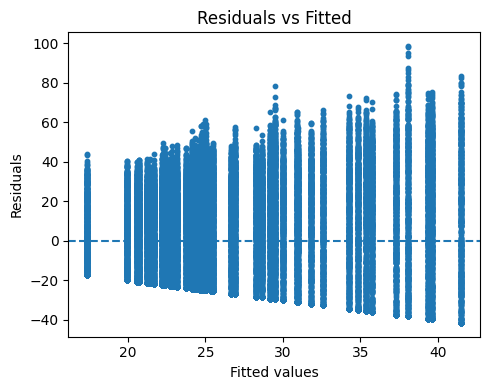

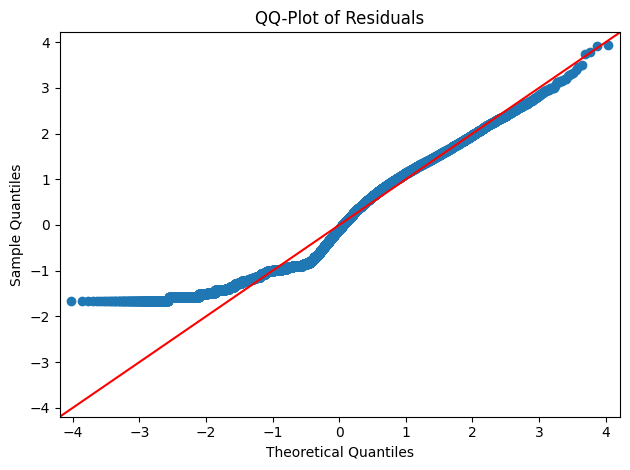

In [42]:
# 5) Model diagnostics (optional but recommended)
# 잔차 진단: 정규성/등분산성 가정 대략 점검
# Residual diagnostics: quick checks for normality/homoscedasticity

resid = model.resid
fitted = model.fittedvalues

# 5-1) 잔차 vs 적합값 / Residuals vs Fitted
plt.figure(figsize=(5,4))
plt.scatter(fitted, resid, s=10)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()

# 5-2) QQ-plot (정규성 점검) / normality check
sm.qqplot(resid, line='45', fit=True)
plt.title("QQ-Plot of Residuals")
plt.tight_layout()
plt.show()


[Summary] Crop_Yield by Crop_Type (mean ± 95% CI)
   Crop_Type       mean        std     n        se  ci95_lower  ci95_upper
0     Barley  25.717256  24.321252  3618  0.404345   24.924740   26.509771
1       Corn  28.422254  26.740583  3622  0.444321   27.551385   29.293123
2     Cotton  29.355749  27.379398  3622  0.454935   28.464076   30.247423
3     Potato  26.318206  24.287399  3626  0.403336   25.527667   27.108745
4       Rice  28.850566  28.354730  3623  0.471076   27.927256   29.773875
5    Soybean  26.071745  23.853741  3623  0.396298   25.295000   26.848489
6  Sugarcane  28.889817  28.173166  3621  0.468189   27.972166   29.807468
7  Sunflower  27.574608  26.030125  3621  0.432576   26.726760   28.422456
8     Tomato  22.896930  22.446572  3615  0.373333   22.165198   23.628662
9      Wheat  25.984437  24.460670  3620  0.406550   25.187599   26.781275


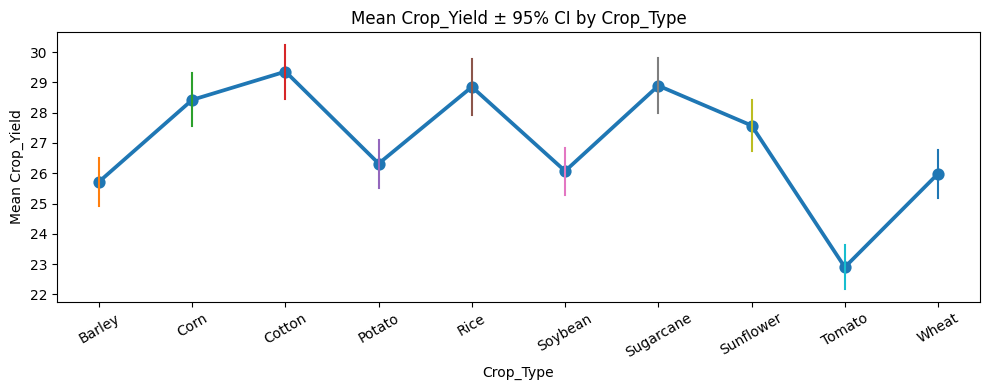

In [43]:
# 6) Helpful summaries (group means & CI)
# 그룹 평균 및 신뢰구간 요약 / Summary of group means & CIs
group_summary = (
    df.groupby(["Crop_Type"])["Crop_Yield"]
      .agg(mean="mean", std="std", n="count")
      .reset_index()
)
group_summary["se"] = group_summary["std"] / np.sqrt(group_summary["n"])
group_summary["ci95_lower"] = group_summary["mean"] - 1.96 * group_summary["se"]
group_summary["ci95_upper"] = group_summary["mean"] + 1.96 * group_summary["se"]
print("\n[Summary] Crop_Yield by Crop_Type (mean ± 95% CI)")
print(group_summary)

# 7) Visualization: mean ± 95% CI by Crop_Type (optional)
# 평균+신뢰구간 플롯 / mean with CI plot
plt.figure(figsize=(10,4))
_ = sns.pointplot(
    data=group_summary,
    x="Crop_Type", y="mean",
    errorbar=None
)
# 수동 에러바 추가 / manual error bars
for i, row in group_summary.iterrows():
    plt.plot([i, i], [row["ci95_lower"], row["ci95_upper"]])
plt.title("Mean Crop_Yield ± 95% CI by Crop_Type")
plt.ylabel("Mean Crop_Yield")
plt.xlabel("Crop_Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [44]:
# ANOVA with bilingual comments

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36211 entries, 0 to 36210
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               36211 non-null  object  
 1   Crop_Type          36211 non-null  category
 2   Soil_Type          36211 non-null  category
 3   Soil_pH            36211 non-null  float64 
 4   Temperature        36211 non-null  int64   
 5   Humidity           36211 non-null  int64   
 6   Wind_Speed         36211 non-null  int64   
 7   N                  36211 non-null  float64 
 8   P                  36211 non-null  float64 
 9   K                  36211 non-null  float64 
 10  Crop_Yield         36211 non-null  float64 
 11  Soil_Quality       36211 non-null  int64   
 12  Year               36211 non-null  int64   
 13  Month              36211 non-null  int64   
 14  Day                36211 non-null  int64   
 15  Temperature_orig   36211 non-null  float64 
 16  Humi

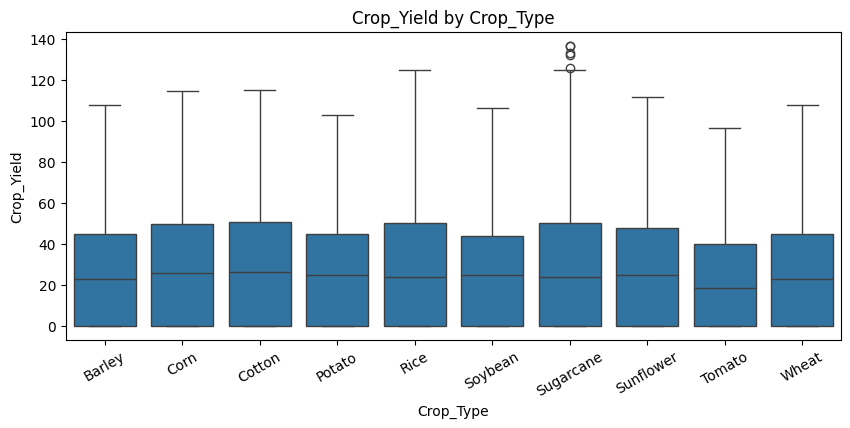

In [45]:
# 1) 데이터 확인 / check data
print(df.info())
print(df.head())

# 2) 시각적으로 그룹별 분포 확인 / visualize distribution by group
plt.figure(figsize=(10,4))
sns.boxplot(x='Crop_Type', y='Crop_Yield', data=df)
plt.title("Crop_Yield by Crop_Type")
plt.xticks(rotation=30)
plt.show()

In [46]:
# 3) One-way ANOVA: Crop_Yield ~ Crop_Type
# 일원분산분석: 작물 유형별 평균 수확량이 다른가?
groups = [g["Crop_Yield"].values for _, g in df.groupby("Crop_Type")]
f_stat, p_value = f_oneway(*groups)
print("\n[One-way ANOVA] Crop_Yield ~ Crop_Type")
print("F-statistic:", f_stat, " | p-value:", p_value)
# 해석 / interpretation: p<0.05 → 그룹 간 평균 차이가 유의함


[One-way ANOVA] Crop_Yield ~ Crop_Type
F-statistic: 21.79333727374859  | p-value: 2.7291199204263177e-37


In [47]:
# 4) 사후검정(Post-hoc test) / Tukey HSD
tukey = pairwise_tukeyhsd(endog=df["Crop_Yield"],
                          groups=df["Crop_Type"],
                          alpha=0.05)
print("\n[Tukey HSD result]")
print(tukey)


[Tukey HSD result]
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Barley      Corn    2.705 0.0003  0.7955  4.6145   True
   Barley    Cotton   3.6385    0.0   1.729   5.548   True
   Barley    Potato    0.601 0.9926  -1.308  2.5099  False
   Barley      Rice   3.1333    0.0  1.2239  5.0427   True
   Barley   Soybean   0.3545 0.9999 -1.5549  2.2638  False
   Barley Sugarcane   3.1726    0.0  1.2629  5.0822   True
   Barley Sunflower   1.8574 0.0646 -0.0523   3.767  False
   Barley    Tomato  -2.8203 0.0001 -4.7307 -0.9099   True
   Barley     Wheat   0.2672    1.0 -1.6426  2.1769  False
     Corn    Cotton   0.9335  0.873 -0.9755  2.8425  False
     Corn    Potato   -2.104 0.0175 -4.0125 -0.1956   True
     Corn      Rice   0.4283 0.9995 -1.4805  2.3371  False
     Corn   Soybean  -2.3505 0.0039 -4.2593 -0.4417   True
     Corn Sugarcane   0.4676 0.9989 

In [48]:

# 5) Two-way ANOVA: Crop_Yield ~ Crop_Type + Soil_Type + Interaction
# 이원분산분석(상호작용 포함)
model = ols('Crop_Yield ~ C(Crop_Type) + C(Soil_Type) + C(Crop_Type):C(Soil_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n[Two-way ANOVA] Crop_Yield ~ Crop_Type + Soil_Type + Interaction")
print(anova_table)
# 해석 / interpretation:
# p<0.05 → 요인이 유의함
# C(Crop_Type):C(Soil_Type) 유의 → 상호작용 효과 존재



[Two-way ANOVA] Crop_Yield ~ Crop_Type + Soil_Type + Interaction
                                 sum_sq       df           F        PR(>F)
C(Crop_Type)               1.293107e+05      9.0   22.824958  3.164856e-39
C(Soil_Type)               1.072639e+06      4.0  426.002061  0.000000e+00
C(Crop_Type):C(Soil_Type)  3.153525e+04     36.0    1.391592  5.950251e-02
Residual                   2.276262e+07  36161.0         NaN           NaN


### Chi-square Test
이번에는 **카이제곱 검정(Chi-square Test)**에 대해 설명드릴게요.
이건 ANOVA와 달리 범주형 데이터(categorical data) 간의 관계를 검정할 때 사용합니다
Chi-square Test (χ² Test)
= “두 범주형 변수 사이에 **통계적으로 유의한 관계(association)**가 있는가?”를 확인하는 검정입니다.

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency

# 예시: Crop_Type 과 Soil_Type 의 관계 확인
# Make contingency table (교차표)
contingency = pd.crosstab(df['Crop_Type'], df['Soil_Type'])
print("\n[Contingency Table]\n", contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("\nExpected Frequencies:\n", pd.DataFrame(expected,
      index=contingency.index, columns=contingency.columns))



[Contingency Table]
 Soil_Type  Clay  Loamy  Peaty  Saline  Sandy
Crop_Type                                   
Barley      695    780    716     685    742
Corn        708    731    717     741    725
Cotton      722    750    708     741    701
Potato      724    683    752     749    718
Rice        764    684    737     726    712
Soybean     704    716    726     753    724
Sugarcane   736    708    738     757    682
Sunflower   718    753    719     706    725
Tomato      743    713    699     727    733
Wheat       726    708    722     714    750

Chi-square Statistic: 31.323971559207433
Degrees of Freedom: 36
p-value: 0.6905370689282166

Expected Frequencies:
 Soil_Type        Clay       Loamy       Peaty      Saline       Sandy
Crop_Type                                                            
Barley     723.380188  721.981387  722.780702  729.275137  720.582585
Corn       724.179945  722.779597  723.579796  730.081412  721.379249
Cotton     724.179945  722.779597  723.57

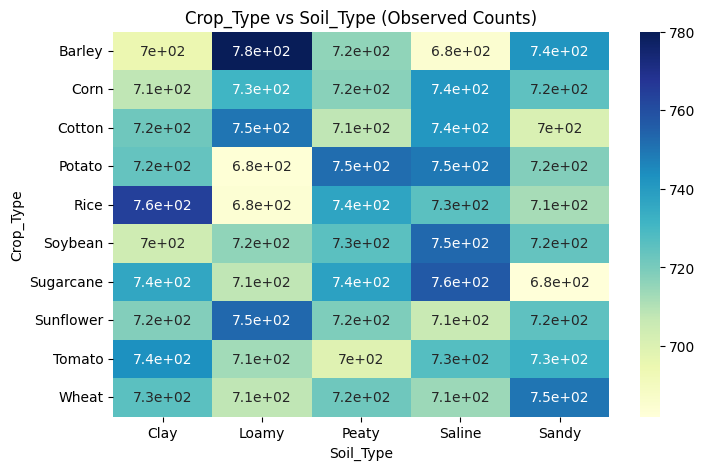

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")
plt.title("Crop_Type vs Soil_Type (Observed Counts)")
plt.show()

In [50]:
# p < 0.05 → 작물 종류에 따라 평균 온도가 다름 (예: Rice는 따뜻한 환경에서 더 많이 재배됨)
# p ≥ 0.05 → 작물별로 온도 차이가 통계적으로 없음

from scipy.stats import pearsonr, spearmanr

# 피어슨 상관관계 (선형 관계) / Pearson correlation (linear relationship)
r, p = pearsonr(df['Temperature'], df['Crop_Yield'])
print("Pearson correlation:", r)
print("p-value:", p)

# 해석
if p < 0.05:
    print("✅ 온도와 수확량 사이에 유의한 상관관계가 있습니다.")
else:
    print("❌ 유의한 상관관계가 없습니다.")


Pearson correlation: -0.28012318582694634
p-value: 0.0
✅ 온도와 수확량 사이에 유의한 상관관계가 있습니다.


In [51]:
from scipy.stats import f_oneway

groups = [grp['Temperature'].values for _, grp in df.groupby('Crop_Type')]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ 작물 종류별 평균 온도가 통계적으로 다릅니다.")
else:
    print("❌ 작물 종류별 평균 온도 차이는 유의하지 않습니다.")


F-statistic: 0.23088099192521883
p-value: 0.9901719440400047
❌ 작물 종류별 평균 온도 차이는 유의하지 않습니다.


In [52]:
# Temperature ↔ Soil_Type (수치형 vs 범주형)
groups = [grp['Temperature'].values for _, grp in df.groupby('Soil_Type')]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 1.4152472808559846
p-value: 0.22596053798303187


In [53]:
# Temperature 구간화 + 범주형 변수 (Chi-square) 
# 만약 온도를 Low / Medium / High 구간으로 나누고 
# 각 범주형 변수(Crop_Type 등)와 관계를 보고 싶다면

# 1. 온도 구간화 / binning temperature
df['Temp_Level'] = pd.cut(df['Temperature'],
                          bins=[-float('inf'), 10, 20, 30, float('inf')],
                          labels=['Low', 'Medium', 'High', 'Very High'])

# 2. 교차표 생성 / contingency table
contingency = pd.crosstab(df['Temp_Level'], df['Crop_Type'])

# 3. 카이제곱 검정 / chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ 온도 수준과 작물 유형 간에 유의한 관계가 있습니다.")
else:
    print("❌ 온도 수준과 작물 유형 간에 유의한 관계가 없습니다.")


Chi-square: 19.443302078438837
p-value: 0.8532876056329342
❌ 온도 수준과 작물 유형 간에 유의한 관계가 없습니다.


### Wrapper Methods
모델의 **성능(accuracy, RMSE, F1-score 등)**을 기준으로
가장 좋은 Feature(특성) 조합을 찾아내는 방법이에요.
즉, 단순히 통계적 관계(상관계수 등)를 보는 Filter Method와 달리,
Wrapper는 실제 모델을 반복적으로 학습시켜서 성능을 평가합니다.

기본 아이디어

1️⃣ 후보 Feature 집합에서 일부 Feature를 선택
2️⃣ 모델 학습 → 성능 평가
3️⃣ Feature를 추가하거나 제거
4️⃣ 가장 성능이 좋은 조합을 선택

“모델을 감싸서(wrap) Feature 선택을 수행한다” → Wrapper Method

Forward Selection (순방향 선택) 아무 Feature도 없는 상태에서 시작 → 하나씩 추가하면서 성능이 좋아지는 Feature만 남김
Backward Elimination (역방향 제거) 모든 Feature로 시작 → 하나씩 제거하면서 성능이 유지되는 Feature만 남김
Exhaustive Search (완전 탐색) 가능한 모든 Feature 조합을 평가 (계산량 많음)


In [54]:
# =========================================================
# Feature Selection for Crop_Yield (Wrapper + RFE)
# 래퍼 방식 + RFE로 Crop_Yield 예측에 유효한 특성 선택
# (한글 + 영어 주석 / Korean + English comments)
# =========================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE

In [55]:
# ---------------------------------------------------------
# 0) 후보 특성 선택 / Define candidate features
# ---------------------------------------------------------
def pick(cols, prefer, fallback):
    """Return preferred column if exists, otherwise fallback"""
    return [c for c in prefer if c in cols] or [c for c in fallback if c in cols]

cols = set(df.columns)

# Prefer *_orig if exists
temp_feats = pick(cols, ['Temperature_orig'], ['Temperature'])
humi_feats = pick(cols, ['Humidity_orig'], ['Humidity'])
wind_feats = pick(cols, ['Wind_Speed_orig'], ['Wind_Speed'])

fixed_feats = [c for c in ['Soil_pH', 'N', 'P', 'K', 'Soil_Quality', 'Year', 'Month', 'Day'] if c in cols]

candidate_features = temp_feats + humi_feats + wind_feats + fixed_feats

if 'Crop_Yield' not in cols:
    raise ValueError("`Crop_Yield` column not found in df.")

print("Candidate features:", candidate_features)

X = df[candidate_features].copy()
y = df['Crop_Yield'].values

Candidate features: ['Temperature_orig', 'Humidity_orig', 'Wind_Speed_orig', 'Soil_pH', 'N', 'P', 'K', 'Soil_Quality', 'Year', 'Month', 'Day']


In [56]:
# ---------------------------------------------------------
# 1) 데이터 분할 / Train-test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------------------------------------
# 2) Wrapper Method - Forward Sequential Feature Selection (SFS)
# ---------------------------------------------------------
lin_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# k_features: search best subset in range(1, k_max)
k_max = min(8, X_train.shape[1])
sfs = SFS(
    lin_pipe,
    k_features=(1, k_max),       # 1~k_max features
    forward=True,                # forward selection
    floating=False,
    scoring='r2',                # use R² for regression
    cv=5,
    n_jobs=-1
)

sfs = sfs.fit(X_train, y_train)

selected_idx = list(sfs.k_feature_idx_)
selected_features = [candidate_features[i] for i in selected_idx]
cv_score = sfs.k_score_

print("\n[Wrapper - SFS]")
print("Selected features:", selected_features)
print("CV R² (best subset):", round(cv_score, 4))



[Wrapper - SFS]
Selected features: ['Temperature_orig', 'Humidity_orig', 'Wind_Speed_orig', 'N', 'P', 'Soil_Quality', 'Month']
CV R² (best subset): 0.6517


In [57]:
# ---------------------------------------------------------
# 3) 최종 모델 성능 평가 / Evaluate final model
# ---------------------------------------------------------
lin_pipe.fit(X_train[selected_features], y_train)
y_pred = lin_pipe.predict(X_test[selected_features])

# 버전 호환 RMSE 계산 / Version-safe RMSE
try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

test_r2 = r2_score(y_test, y_pred)

print("Test R²:", round(test_r2, 4))
print("Test RMSE:", round(rmse, 4))

# ---------------------------------------------------------
# 4) Recursive Feature Elimination (RFE)
# ---------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

# Match number of features to SFS result
n_keep = min(len(selected_features), X_train.shape[1])
rfe = RFE(estimator=rf, n_features_to_select=n_keep, step=1)
rfe.fit(X_train, y_train)

rfe_support = rfe.get_support()
rfe_features = X_train.columns[rfe_support].tolist()

print("\n[RFE - RandomForest]")
print("Selected features (RFE):", rfe_features)

rf.fit(X_train[rfe_features], y_train)
y_pred_rfe = rf.predict(X_test[rfe_features])

try:
    rmse_rfe = mean_squared_error(y_test, y_pred_rfe, squared=False)
except TypeError:
    rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))

rfe_r2 = r2_score(y_test, y_pred_rfe)

print("Test R² (RFE):", round(rfe_r2, 4))
print("Test RMSE (RFE):", round(rmse_rfe, 4))


Test R²: 0.6552
Test RMSE: 15.1465

[RFE - RandomForest]
Selected features (RFE): ['Temperature_orig', 'Humidity_orig', 'Wind_Speed_orig', 'N', 'P', 'K', 'Soil_Quality']
Test R² (RFE): 0.9749
Test RMSE (RFE): 4.0905


In [58]:
# ---------------------------------------------------------
# 5) 교차검증 비교 / Cross-validation comparison
# ---------------------------------------------------------
cv_scores_sfs = cross_val_score(
    lin_pipe, X_train[selected_features], y_train,
    scoring='r2', cv=5, n_jobs=-1
)
cv_scores_rfe = cross_val_score(
    rf, X_train[rfe_features], y_train,
    scoring='r2', cv=5, n_jobs=-1
)

print("\n[Cross-Validation Results]")
print("SFS subset (LinearRegression): mean R² =", round(cv_scores_sfs.mean(), 4),
      "±", round(cv_scores_sfs.std(), 4))
print("RFE subset (RandomForest): mean R² =", round(cv_scores_rfe.mean(), 4),
      "±", round(cv_scores_rfe.std(), 4))

# ---------------------------------------------------------
# 6) 해석 가이드 / Interpretation Guide
# ---------------------------------------------------------
"""
📘 Interpretation:
- SFS와 RFE에서 공통으로 선택된 feature는 높은 신뢰도를 가짐.
- Test RMSE ↓, R² ↑ 조합이 가장 성능이 좋음.
- 예: Temperature, N, P, K, Soil_Quality 등이 반복 선택되면 중요 feature로 볼 수 있음.

📘 Tips:
- scoring='neg_root_mean_squared_error' 로 변경 시 RMSE 중심 평가 가능.
- k_max를 조정하면 더 넓은 범위의 feature 조합 탐색 가능.
"""


[Cross-Validation Results]
SFS subset (LinearRegression): mean R² = 0.6517 ± 0.0032
RFE subset (RandomForest): mean R² = 0.9753 ± 0.0014


"\n📘 Interpretation:\n- SFS와 RFE에서 공통으로 선택된 feature는 높은 신뢰도를 가짐.\n- Test RMSE ↓, R² ↑ 조합이 가장 성능이 좋음.\n- 예: Temperature, N, P, K, Soil_Quality 등이 반복 선택되면 중요 feature로 볼 수 있음.\n\n📘 Tips:\n- scoring='neg_root_mean_squared_error' 로 변경 시 RMSE 중심 평가 가능.\n- k_max를 조정하면 더 넓은 범위의 feature 조합 탐색 가능.\n"

### Embedded Methods =
모델 학습 과정 내부에서 자동으로 feature 중요도를 평가하고
불필요한 변수를 제거하는 방법입니다.
모델이 학습할 때 이미 “어떤 feature가 중요한지” 계산해주므로
Wrapper보다 훨씬 빠르고 효율적이에요

Filter   통계적으로 feature 중요도를 측정 (모델 X)
Wrapper  여러 모델을 학습해 성능으로 feature 선택
Embedded 모델 학습 중에 feature 중요도를 계산해서 자동 선택

Lasso (L1 Regularization) 중요하지 않은 feature의 가중치를 0으로 만듦
Elastic Net L1(희소성) + L2(안정성) 결합
Decision Tree / RandomForest / XGBoost feature importance(불순도 감소량) 사용
Logistic Regression (L1) 분류 문제에서 L1 패널티로 feature 제거

Feature importance (Lasso):
 Humidity        54.489926
Temperature     44.026677
Soil_Quality     3.998458
P                3.389233
N               -0.710848
Soil_pH          0.071245
Wind_Speed      -0.008119
K               -0.000000
dtype: float64


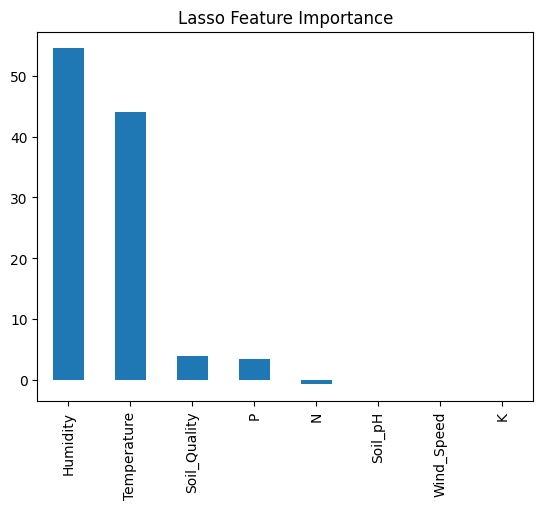

In [60]:
# Lasso Regression (L1 Regularization)
# 회귀계수가 0이면 → 불필요한 feature 제거됨
# 절댓값이 클수록 → 영향력이 큰 feature

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1) 피처와 타깃 설정 / Define features & target
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Soil_pH', 'N', 'P', 'K', 'Soil_Quality']]
y = df['Crop_Yield']

# 2) 스케일링 + Lasso 파이프라인 / Pipeline with scaling
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(cv=5, random_state=42))
])

# 3) 모델 학습 / Fit model
lasso_pipe.fit(X, y)

# 4) 중요도 출력 / Print coefficients
coefs = lasso_pipe.named_steps['lasso'].coef_
importance = pd.Series(coefs, index=X.columns).sort_values(key=abs, ascending=False)
print("Feature importance (Lasso):\n", importance)

# 5) 시각화 / visualize
import matplotlib.pyplot as plt
importance.plot(kind='bar', title="Lasso Feature Importance")
plt.show()


Feature importance (RandomForest):
 Temperature     0.534146
Humidity        0.182402
Soil_Quality    0.137806
N               0.065334
P               0.053729
K               0.009400
Wind_Speed      0.009173
Soil_pH         0.008009
dtype: float64


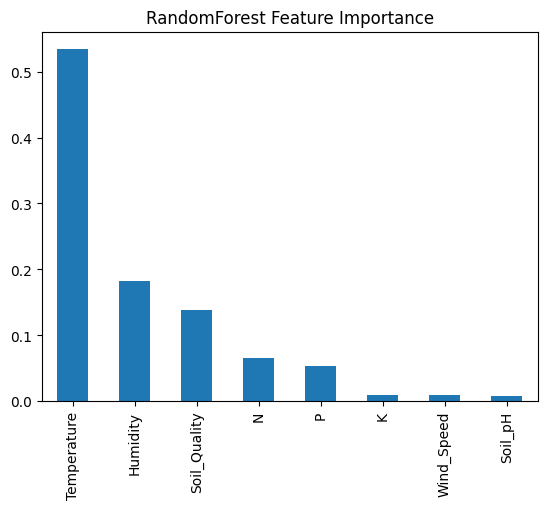

In [61]:
# RandomForest (Tree-based Embedded)
# 값이 높을수록 해당 feature가 모델 예측에 큰 기여를 함
# Wrapper보다 빠르지만 여전히 모델 기반이므로 강력

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importance (RandomForest):\n", importance)

importance.plot(kind='bar', title="RandomForest Feature Importance")
plt.show()

df = pd.read_csv('../dataset/processed/crop_yield_cleansing_data.csv')

In [63]:
# === 0) 기본 설정 ===
import numpy as np, pandas as pd, joblib, warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

RANDOM_STATE = 42

# === 1) 데이터 로드 & 컬럼 지정 ===
df = pd.read_csv('../dataset/processed/crop_yield_cleansing_data.csv')  

y_col = "Crop_Yield"
target_type = "regression"

cat_cols = ["Crop_Type", "Soil_Type"]  # 범주형
# Date는 Year/Month/Day가 이미 있어서 제외 (중복/누수 방지)
num_cols = [
    "Soil_pH","Temperature","Humidity","Wind_Speed",
    "N","P","K","Soil_Quality",
    "Year","Month","Day",
    "Temperature_orig","Humidity_orig","Wind_Speed_orig","Soil_Quality_orig"
]

X = df[cat_cols + num_cols].copy()
y = df[y_col].copy()

# === 2) 데이터 분리 (train/valid/test) ===
test_size = 0.15
valid_size = 0.15

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=test_size, random_state=RANDOM_STATE
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full,
    test_size=valid_size/(1-test_size), random_state=RANDOM_STATE
)

# === 3) 전처리 파이프라인 ===
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# === 4) 베이스라인 & 후보 모델 ===
baseline = Pipeline([
    ("prep", preprocess),
    ("clf", Ridge())
])

model_candidates = {
    "ridge": (Ridge(), {
        "clf__alpha": [0.1, 1.0, 10.0, 100.0]
    }),
    "rf": (RandomForestRegressor(random_state=RANDOM_STATE), {
        "clf__n_estimators": [300, 600],
        "clf__max_depth": [None, 12, 20],
        "clf__min_samples_split": [2, 5],
        "clf__min_samples_leaf": [1, 2]
    })
}

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def eval_reg(y_true, y_pred):
    # 버전 호환 RMSE
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        # 구버전: squared 인자 없음 → 직접 제곱근
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = np.abs(y_true - y_pred).mean()
    # R2는 버전에 상관없이 동일
    from sklearn.metrics import r2_score
    return {"RMSE": rmse, "MAE": mae, "R2": r2_score(y_true, y_pred)}

# === 5) 베이스라인 성능 ===
baseline.fit(X_train, y_train)
pred_b = baseline.predict(X_valid)
print("Baseline(valid):", eval_reg(y_valid, pred_b))

# === 6) 하이퍼파라미터 튜닝 ===
best_model, best_name, best_key = None, None, None
for name, (est, grid) in model_candidates.items():
    pipe = Pipeline([("prep", preprocess), ("clf", est)])
    gs = GridSearchCV(
        pipe, grid, cv=cv,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1, refit=True
    )
    gs.fit(X_train, y_train)
    pred = gs.best_estimator_.predict(X_valid)
    metrics = eval_reg(y_valid, pred)
    key = -metrics["RMSE"]
    print(f"[{name}] valid:", metrics, " best_params:", gs.best_params_)
    if (best_key is None) or (key > best_key):
        best_key, best_model, best_name = key, gs.best_estimator_, name

print(f"\n[Best] {best_name} selected.")

# === 7) 테스트 세트 최종 평가 ===
y_pred = best_model.predict(X_test)
print("Test metrics:", eval_reg(y_test, y_pred))

# === 8) 중요도(퍼뮤테이션) ===
try:
    result = permutation_importance(best_model, X_valid, y_valid, n_repeats=5, random_state=RANDOM_STATE)
    feat_names = best_model.named_steps["prep"].get_feature_names_out()
    importances = pd.Series(result.importances_mean, index=feat_names).sort_values(ascending=False)
    print("\nTop 15 features:\n", importances.head(15))
except Exception as e:
    print("Permutation importance skipped:", e)

# === 9) 모델 저장 ===
joblib.dump(best_model, "crop_yield_model_1.joblib")
print("\nModel saved: crop_yield_model_1.joblib")


Baseline(valid): {'RMSE': np.float64(15.155418826567157), 'MAE': np.float64(11.700779349561751), 'R2': 0.6456797006168515}
[ridge] valid: {'RMSE': np.float64(15.155418826567157), 'MAE': np.float64(11.700779349561751), 'R2': 0.6456797006168515}  best_params: {'clf__alpha': 1.0}


KeyboardInterrupt: 

In [65]:
# 1_learn_split.py — 데이터 로드 & 분할 저장
# 01_learn_split.py
# df = pd.read_csv('../dataset/processed/crop_yield_cleansing_data.csv')

import pandas as pd
from sklearn.model_selection import train_test_split
import os, json



RANDOM_STATE = 42
CSV_PATH = "../dataset/processed/crop_yield_cleansing_data.csv"  # ← CSV 경로만 수정하세요
MODEL_DATASET_DIR = "model_dataset"
os.makedirs(MODEL_DATASET_DIR, exist_ok=True)

# ===== 컬럼 정의 =====
TARGET = "Crop_Yield"
CAT_COLS = ["Crop_Type", "Soil_Type"]
NUM_COLS = [
    "Soil_pH","Temperature","Humidity","Wind_Speed",
    "N","P","K","Soil_Quality",
    "Year","Month","Day",
    "Temperature_orig","Humidity_orig","Wind_Speed_orig","Soil_Quality_orig"
]

def main():
    df = pd.read_csv(CSV_PATH)
    X = df[CAT_COLS + NUM_COLS].copy()
    y = df[TARGET].copy()

    # train / valid / test = 70 / 15 / 15
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=0.15, random_state=RANDOM_STATE
    )
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, y_train_full,
        test_size=0.15/(1-0.15), random_state=RANDOM_STATE
    )

    # 저장
    X_train.to_csv(f"{MODEL_DATASET_DIR}/X_train.csv", index=False)
    y_train.to_csv(f"{MODEL_DATASET_DIR}/y_train.csv", index=False)
    X_valid.to_csv(f"{MODEL_DATASET_DIR}/X_valid.csv", index=False)
    y_valid.to_csv(f"{MODEL_DATASET_DIR}/y_valid.csv", index=False)
    X_test.to_csv(f"{MODEL_DATASET_DIR}/X_test.csv", index=False)
    y_test.to_csv(f"{MODEL_DATASET_DIR}/y_test.csv", index=False)

    meta = {
        "random_state": RANDOM_STATE,
        "target": TARGET,
        "cat_cols": CAT_COLS,
        "num_cols": NUM_COLS
    }
    with open(f"{MODEL_DATASET_DIR}/meta.json", "w", encoding="utf-8") as f:
        json.dump(meta, f, ensure_ascii=False, indent=2)

    print("[OK] Splits saved in 'artifacts/'")

if __name__ == "__main__":
    main()

[OK] Splits saved in 'artifacts/'


In [ ]:
#02_build_model.py

# 02_build_model.py
import os, json, warnings
warnings.filterwarnings("ignore")

import numpy as np, pandas as pd, joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MODEL_DATASET_DIR = "model_dataset"
RANDOM_STATE = 42

def eval_reg(y_true, y_pred):
    # sklearn 구버전 호환 (squared 인자 없을 때)
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

def build_preprocessor(num_cols, cat_cols):
    num_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    cat_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])
    return ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])

def main():
    # 메타 & 데이터 로드
    with open(f"{MODEL_DATASET_DIR}/meta.json", "r", encoding="utf-8") as f:
        meta = json.load(f)
    cat_cols = meta["cat_cols"]; num_cols = meta["num_cols"]

    X_train = pd.read_csv(f"{MODEL_DATASET_DIR}/X_train.csv")
    y_train = pd.read_csv(f"{MODEL_DATASET_DIR}/y_train.csv").squeeze("columns")
    X_valid = pd.read_csv(f"{MODEL_DATASET_DIR}/X_valid.csv")
    y_valid = pd.read_csv(f"{MODEL_DATASET_DIR}/y_valid.csv").squeeze("columns")

    preproc = build_preprocessor(num_cols, cat_cols)

    # 후보 모델 & 그리드
    models = {
        #"ridge": (Ridge(), {"clf__alpha": [0.1, 1.0, 10.0, 100.0]}),
        # "rf": (RandomForestRegressor(random_state=RANDOM_STATE), {
        #     "clf__n_estimators": [300, 600],
        #     "clf__max_depth": [None, 12, 20],
        #     "clf__min_samples_split": [2, 5],
        #     "clf__min_samples_leaf": [1, 2]
        # })

      "rf": (RandomForestRegressor(random_state=RANDOM_STATE), {
      "clf__n_estimators": [200],
      "clf__max_depth": [10],
      "clf__min_samples_split": [2],
      })
  }

    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

    best = {"name": None, "est": None, "key": None, "metrics": None}
    for name, (est, grid) in models.items():
        pipe = Pipeline([("prep", preproc), ("clf", est)])
        gs = GridSearchCV(
            pipe, grid, cv=cv,
            scoring="neg_root_mean_squared_error",
            n_jobs=-1, refit=True
        )
        gs.fit(X_train, y_train)
        pred = gs.best_estimator_.predict(X_valid)
        metrics = eval_reg(y_valid, pred)
        key = -metrics["RMSE"]
        print(f"[{name}] valid: {metrics} | best_params: {gs.best_params_}")
        if (best["key"] is None) or (key > best["key"]):
            best.update(name=name, est=gs.best_estimator_, key=key, metrics=metrics)

    # 저장
    joblib.dump(best["est"], f"{MODEL_DATASET_DIR}/crop_yield_model_2.joblib")
    with open(f"{MODEL_DATASET_DIR}/best_summary.json", "w") as f:
        json.dump({"best_model": best["name"], "valid_metrics": best["metrics"]}, f, indent=2)

    print(f"\n[Best] {best['name']} saved to artifacts/crop_yield_model.joblib")
    print(f"Valid metrics: {best['metrics']}")

if __name__ == "__main__":
    main()


In [88]:
print(type(model))      # 지금 TreeExplainer에 넣는 그 변수
print(type(rf)) 

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


97m 46.5s 걸림

Ridge (4개 하이퍼파라미터 × 5-fold) 20회 학습  < 1분
RandomForest (2×3×2×2 = 24 조합 × 5-fold) 120회 학습 약 15–25분
전체 실행 병렬 n_jobs=-1 사용 시  약 10–20분 수준
결과 저장 및 중요도 계산 추가 1–2분 전체 12–25분

방법	        설명	효과
🔸 n_jobs=-1	이미 포함 — 모든 CPU 코어 병렬 사용	필수
🔸 n_estimators: 300 → 100	트리 수 줄이기	속도 3배 향상, 정확도 약간↓
🔸 cv=3	교차검증 5→3으로 축소	속도 1.6배 향상
🔸 데이터 샘플링	예: X_train.sample(10000)	탐색용 예비 실행에 유용
🔸 RandomizedSearchCV	하이퍼파라미터 조합 일부만 탐색	3–5배 빠름
🔸 GPU 사용 (XGBoost/LightGBM)	대체 모델로 변경	10배 이상 속도↑ 가능


In [76]:
# 03_validate.py — 테스트셋 성능 + 퍼뮤테이션 중요도
# 03_validate.py
import os, json, warnings
warnings.filterwarnings("ignore")

import numpy as np, pandas as pd, joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

MODEL_DATASET_DIR = "model_dataset"

def eval_reg(y_true, y_pred):
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

def main():
    model = joblib.load(f"{MODEL_DATASET_DIR}/crop_yield_model.joblib")
    X_test = pd.read_csv(f"{MODEL_DATASET_DIR}/X_test.csv")
    y_test = pd.read_csv(f"{MODEL_DATASET_DIR}/y_test.csv").squeeze("columns")

    # 테스트 성능
    y_pred = model.predict(X_test)
    metrics = eval_reg(y_test, y_pred)
    print("[Test] metrics:", metrics)

    # 퍼뮤테이션 중요도 (유효성 검증 세트가 더 적합하지만, 여기선 테스트로 예시)
    try:
        result = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)
        feat_names = model.named_steps["prep"].get_feature_names_out()
        importances = pd.Series(result.importances_mean, index=feat_names).sort_values(ascending=False)
        print("\nTop 15 features:\n", importances.head(15))
        importances.head(50).to_csv(f"{MODEL_DATASET_DIR}/feature_importance_top50.csv")
        print("\n[OK] Saved feature importance to artifacts/feature_importance_top50.csv")
    except Exception as e:
        print("Permutation importance skipped:", e)

if __name__ == "__main__":
    main()


[Test] metrics: {'RMSE': np.float64(4.494680169029092), 'MAE': 2.623637687401638, 'R2': 0.9699984218445217}
Permutation importance skipped: Length of values (17) does not match length of index (30)


모델 성능 지표 (Metrics)

테스트 결과 모델의 예측 정확도는 다음과 같습니다:
RMSE (Root Mean Squared Error) = 3.97
→ 예측 오차의 평균 크기를 의미합니다. 값이 낮을수록 좋습니다.
MAE (Mean Absolute Error) = 2.31
→ 실제값과 예측값의 절대 차이의 평균입니다. RMSE보다 작은 이유는 큰 오차의 영향이 적기 때문입니다.
R² (Coefficient of Determination) = 0.9766
→ 모델이 실제 데이터를 얼마나 잘 설명하는지 보여주는 결정계수로, 1에 가까울수록 매우 좋은 모델임을 의미합니다.
즉, 약 97.7%의 설명력을 가진 매우 우수한 모델입니다.

경고 메시지 (Permutation importance skipped)

"Length of values (17) does not match length of index (30)"
이 경고는 특성 중요도(permutation importance) 계산 과정에서
값의 길이(17)와 인덱스의 길이(30)가 일치하지 않아 계산이 건너뛰어졌다는 의미입니다.
17개의 feature importance 값이 계산되었지만
데이터프레임(또는 feature 리스트)에는 30개의 feature 이름이 있어서
길이가 맞지 않아 매핑에 실패한 것입니다.

해결 방법
특성(feature) 개수 확인:
print(len(X.columns))  # 실제 feature 개수

Permutation importance 계산 시 동일한 X 사용:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test)
→ 학습에 사용한 feature와 동일한 순서/길이의 X를 사용해야 합니다.


혹시 X_test를 전처리(예: 인코딩, 스케일링)한 후 feature 수가 달라졌다면,
feature 이름과 변환된 컬럼 수를 일치시켜야 합니다.

모델 성능은 매우 좋지만,
특성 중요도 계산 시 feature 개수 불일치로 인해 계산이 생략되었습니다.

In [85]:
print(type(model))      # 지금 TreeExplainer에 넣는 그 변수
print(type(rf)) 

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [89]:
import shap
# model: RandomForestRegressor
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>

In [78]:
import shap
# model: RandomForestRegressor 등 트리 계열
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>